In [1]:
# pip install yfinance

     |████████████████████████████████| 6.3 MB 106 kB/s eta 0:00:01
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=d05e15f11c98aaff6cfeb901d2894389fc6573f0e7e43f3eff0dd643f34f780b
  Stored in directory: /home/shane/.cache/pip/wheels/26/af/8b/fac1b47dffef567f945641cdc9b67bb25fae5725d462a8cf81
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8367 sha256=110f7a67c2117578d348fe0f0a62d75bf6d5c8001341fc52510f307284dd8aaf
  Stored in directory: /home/shane/.cache/pip/wheels/ae/25/47/4d68431a7ec1b6c4b5233365934b74c1d4e665bf5f968d363a
Successfully built yfinance multitasking
  Attempting uninstall: lxml
    Found existing installation: lxml 4.5.0
    Uninstalling lxml-4.5.0:
      Successfully uninstalled lxml-4.5.0
You should consider upgrading via the '/home/shane/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


# Playing With the yfinance library

In [2]:
import yfinance as yf

# Tesla Stocks

In [3]:
df = yf.download(tickers='TSLA', start='2019-01-01', end= '2019-12-31', progress = False)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,67.557999,67.842003,65.052002,66.559998,66.559998,31511500
2019-01-02,61.220001,63.026001,59.759998,62.023998,62.023998,58293000
2019-01-03,61.400002,61.880001,59.476002,60.071999,60.071999,34826000
2019-01-04,61.200001,63.599998,60.546001,63.537998,63.537998,36970500
2019-01-07,64.344002,67.348000,63.549999,66.991997,66.991997,37756000


# Amazon Stocks

In [34]:
df = yf.download(tickers='AMZN', start='2019-01-01', end= '2019-12-31', progress = False)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,1510.800049,1520.760010,1487.000000,1501.969971,1501.969971,6954500
2019-01-02,1465.199951,1553.359985,1460.930054,1539.130005,1539.130005,7983100
2019-01-03,1520.010010,1538.000000,1497.109985,1500.280029,1500.280029,6975600
2019-01-04,1530.000000,1594.000000,1518.310059,1575.390015,1575.390015,9182600
2019-01-07,1602.310059,1634.560059,1589.189941,1629.510010,1629.510010,7993200


# Importing Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

# Importing the Customers_in_a_Shop dataset

In [36]:
df = pd.read_csv('Customers_in_a_Shop.csv')
df.columns = ['Date', 'Customers']
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')
df = df.set_index('Date')
df.head()

,Customers
Date,
1949-02-01,120.0
1949-03-01,134.0
1949-04-01,67.0
1949-05-01,123.0
1949-06-01,137.0


In [37]:
df.shape

(143, 1)

# Chesking for Null values

In [38]:
df.isnull().sum()

Customers    4
dtype: int64

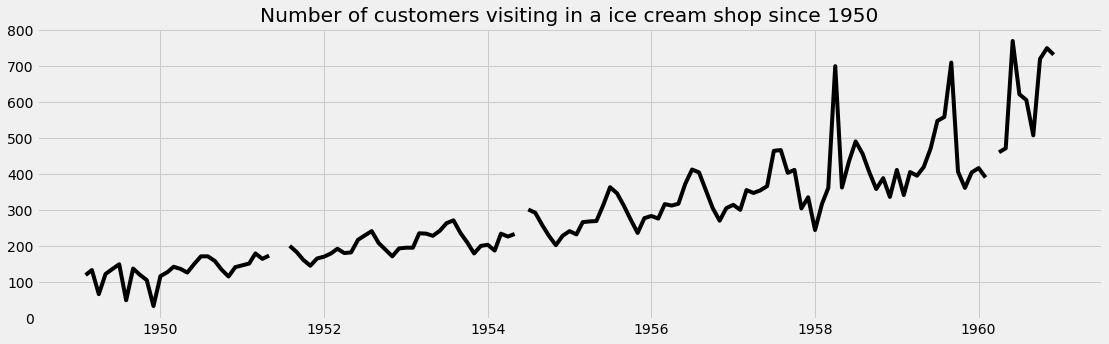

In [39]:
figure = plt.figure(figsize=(17,5))
plt.plot(df, color='black')
plt.title('Number of customers visiting in a ice cream shop since 1950')
plt.show()

# Imputing missing data

In [41]:
df['Customers_mean'] = df['Customers'].fillna(df['Customers'].mean())

In [42]:
df.head()

,Customers,Customers_mean
Date,,
1949-02-01,120.0,120.0
1949-03-01,134.0,134.0
1949-04-01,67.0,67.0
1949-05-01,123.0,123.0
1949-06-01,137.0,137.0


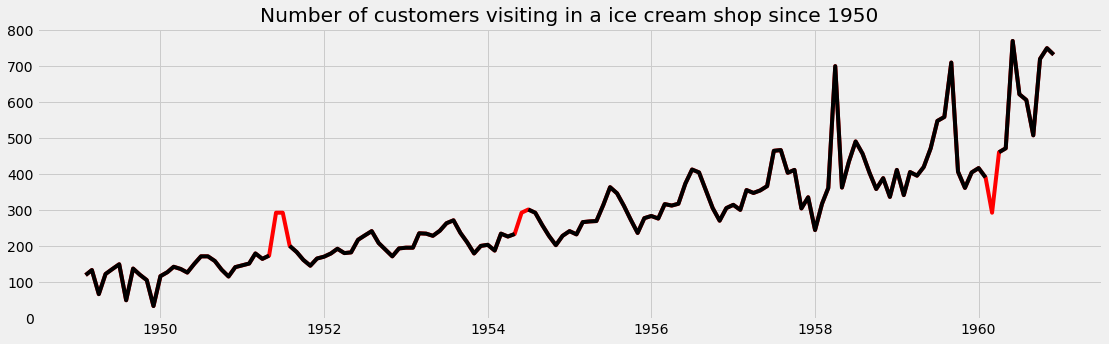

In [43]:
figure = plt.figure(figsize=(17,5))
plt.plot(df['Customers_mean'], color='red')
plt.plot(df['Customers'], color='black')
plt.title('Number of customers visiting in a ice cream shop since 1950')
plt.show()

In [44]:
# Last observation carried forward - LOCF

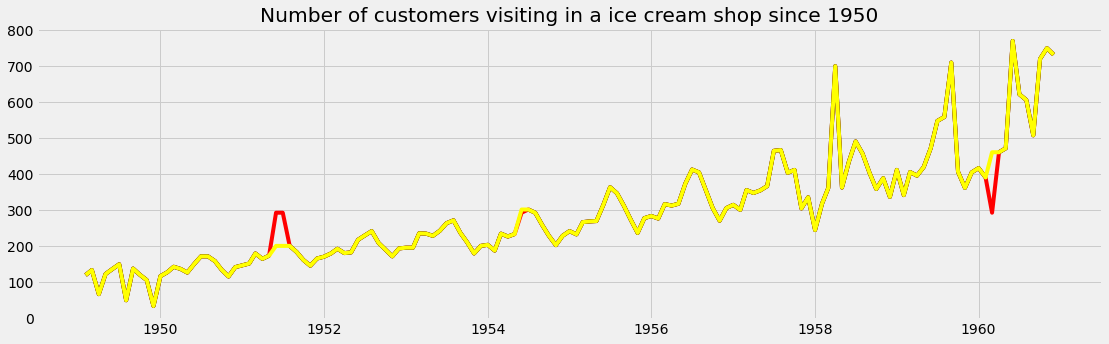

In [45]:
df['Customers_locf'] = df['Customers'].bfill()
figure = plt.figure(figsize=(17,5))
plt.plot(df['Customers_mean'], color='red')
plt.plot(df['Customers'], color='black')
plt.plot(df['Customers_locf'], color='yellow')

plt.title('Number of customers visiting in a ice cream shop since 1950')
plt.show()

Linear interpolation

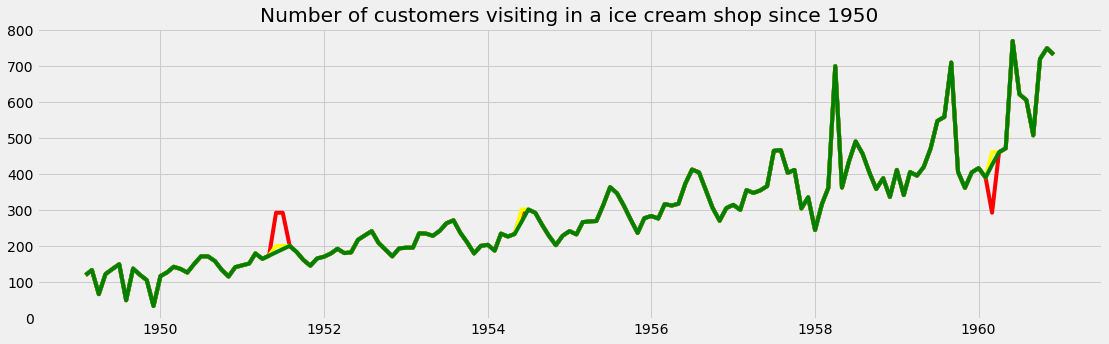

In [46]:
df['Customers_interpol_l'] = df['Customers'].interpolate(method ='linear')
figure = plt.figure(figsize=(17,5))
plt.plot(df['Customers_mean'], color='red')
plt.plot(df['Customers'], color='black')
plt.plot(df['Customers_locf'], color='yellow')
plt.plot(df['Customers_interpol_l'], color='green')

plt.title('Number of customers visiting in a ice cream shop since 1950')
plt.show()

# Outlier Handling - capping

In [48]:
df.index[df['Customers'].isnull()]

DatetimeIndex(['1951-06-01', '1951-07-01', '1954-06-01', '1960-03-01'], dtype='datetime64[ns]', name='Date', freq=None)

In [49]:
df.loc['1960-03'].fillna((df['1949-03':'1959-03':12].sum())/df['1949-03':'1959-03':12].shape[0], inplace=True)

<IPython.core.display.Javascript object>

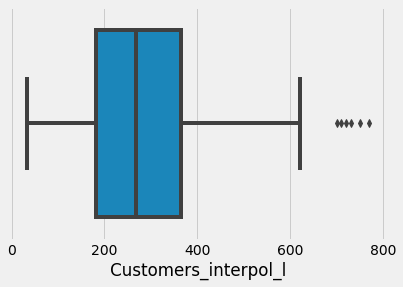

In [52]:
sns.boxplot(df['Customers_interpol_l'])

In [50]:
# Handling Outliers in timeseries data

In [53]:
# capping outliers
df['Customers_interpol_l'].loc[df['Customers_interpol_l']>=700] = 622
df.isnull().sum()

Customers               3
Customers_mean          0
Customers_locf          0
Customers_interpol_l    0
dtype: int64

<IPython.core.display.Javascript object>

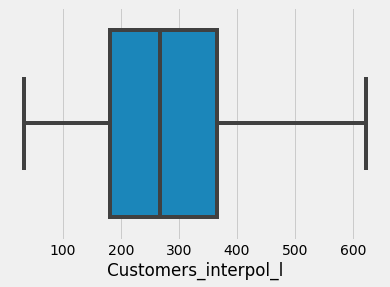

In [54]:
sns.boxplot(df['Customers_interpol_l'])

In [55]:
# Time Series Decomposition

# Decomposition methods 

* Additive Seasonality --> y(t) = Level+Tren+Seasonality+Noise

* Multiplicative Seasonl decomposition --> y(t) = Level *Tred *Seasonality*Noice


* we use additive model when the magnitude of seasonality does not change in relation to time

* we use multiplicative models when the magnitude of the seasonal pattern in the data depends on the magnitude of the data(if with the time data is increase)

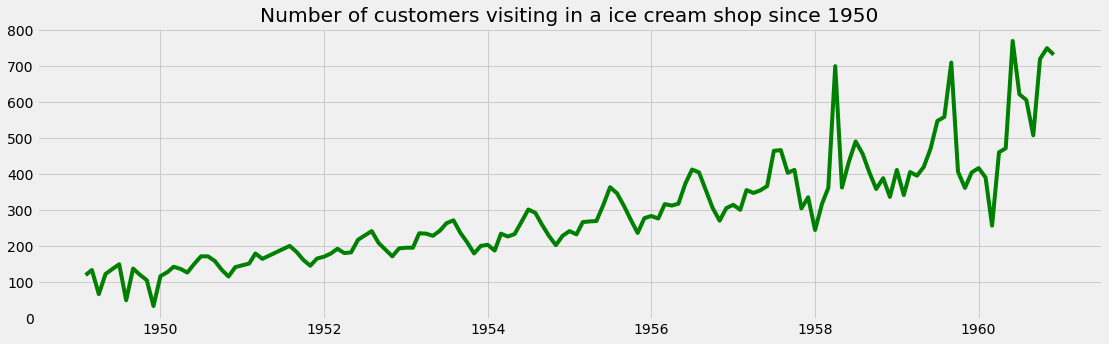

In [56]:
figure = plt.figure(figsize=(17,5))
plt.plot(df['Customers_interpol_l'], color='green')

plt.title('Number of customers visiting in a ice cream shop since 1950')
plt.show()

In [57]:
import statsmodels.api as sm

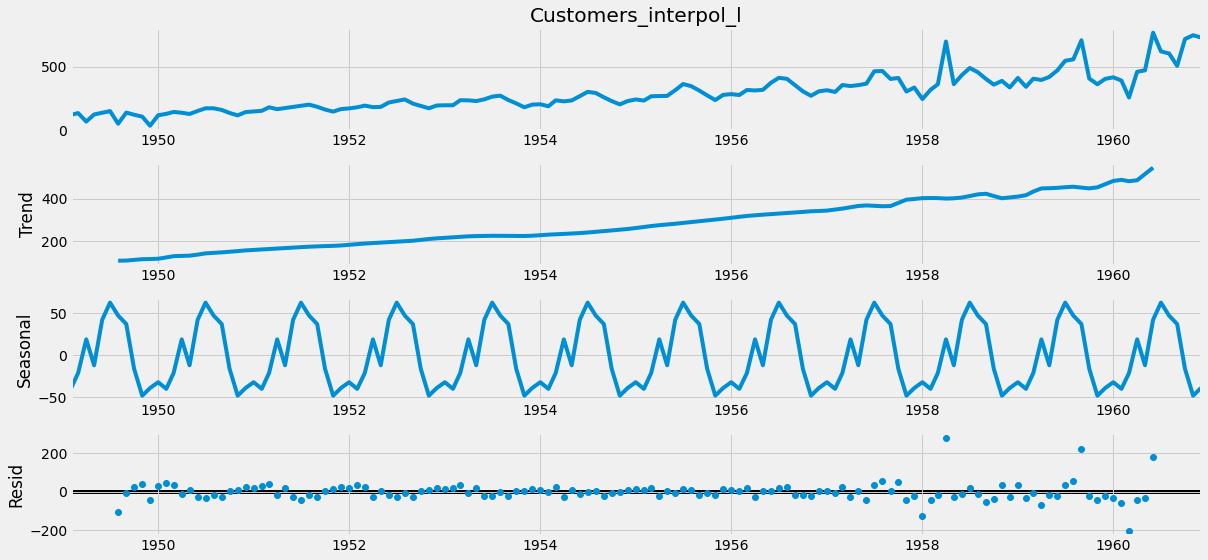

In [62]:
plt.rcParams['figure.figsize'] = (17, 8)
decomposition = sm.tsa.seasonal_decompose(df['Customers_interpol_l'], model='additive')
decomposition.plot()

plt.show()

In [63]:
# residual - leforver after trend and seasonality

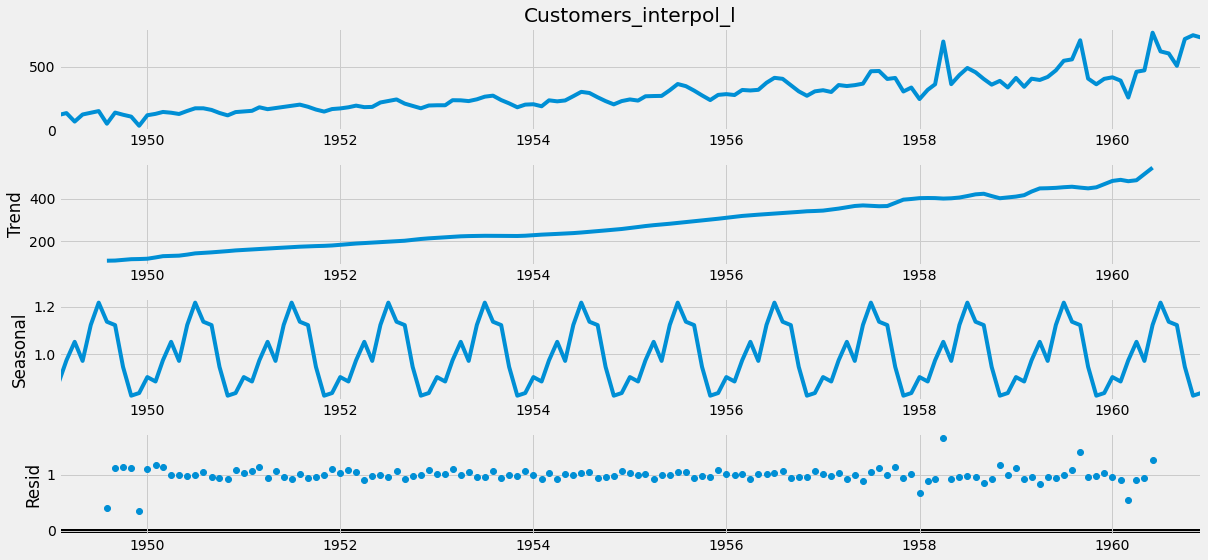

In [64]:
plt.rcParams['figure.figsize'] = (17, 8)
decomposition = sm.tsa.seasonal_decompose(df['Customers_interpol_l'], model='multiplicative')
decomposition.plot()

plt.show()

In [65]:
# no residual so everything is captured by the seasonal data

# Spliting timeseries data

* One step validation - in one-step validation, the tests data is exactly after the train data

* Multi-step validation - same as one-step validation with the difference that in multi-step we dont consider the exact next point after train data points 

In [67]:
length_train= 115
train = df.iloc[:length_train, :]
test = df.iloc[length_train:, :]
print(train.shape)
print(test.shape)

(115, 4)
(28, 4)


In [69]:
# Basic Forecasting Techniques - smoothing

* Naive - it looks at the last historical data and extrapolates it for all the future data and without adjusting or attemptiong to establish causal factors


# Naive Methods

In [71]:
y_naive = test.copy()
y_naive['forecasted_naive'] = train['Customers_interpol_l'][length_train-1]

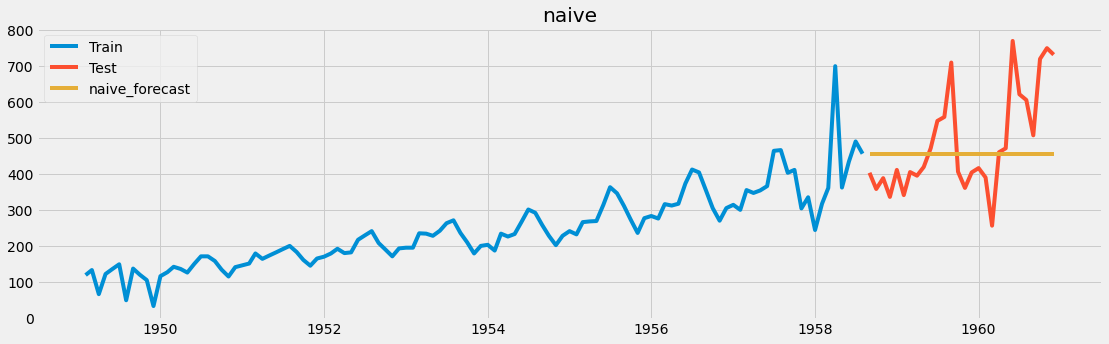

In [72]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers_interpol_l'], label= 'Train')
plt.plot(test['Customers_interpol_l'], label = 'Test')
plt.plot(y_naive['forecasted_naive'], label= 'naive_forecast')

plt.legend()
plt.title('naive')
plt.show()

# Simple Average Method

In [77]:
y_avg = test.copy()
y_avg['forecasted_avg'] = train['Customers_interpol_l'].mean()

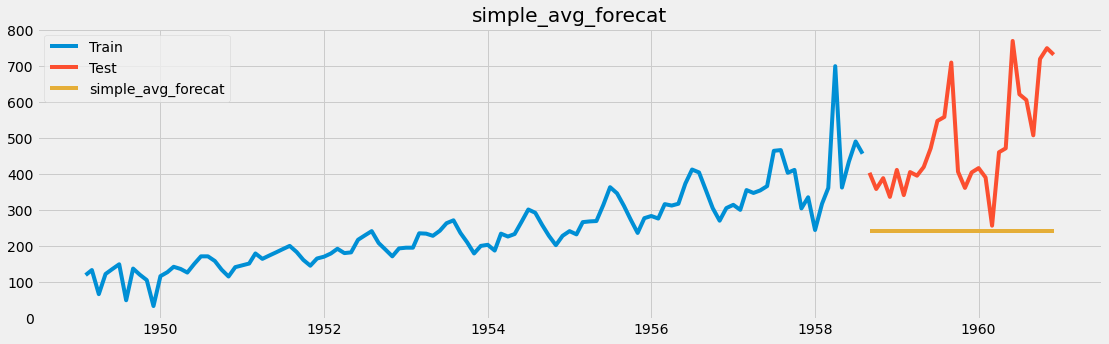

In [79]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers_interpol_l'], label= 'Train')
plt.plot(test['Customers_interpol_l'], label = 'Test')
plt.plot(y_avg['forecasted_avg'], label= 'simple_avg_forecat')

plt.legend()
plt.title('simple_avg_forecat')
plt.show()

# simple moving avg method

In [83]:
 # Metrics
y_mvg_avg = df.copy()
window= 9
y_mvg_avg['forecasted_mvg_avg'] = df['Customers_interpol_l'].rolling(window).mean()
y_mvg_avg['forecasted_mvg_avg'][length_train:] = y_mvg_avg['forecasted_mvg_avg'][length_train-1]

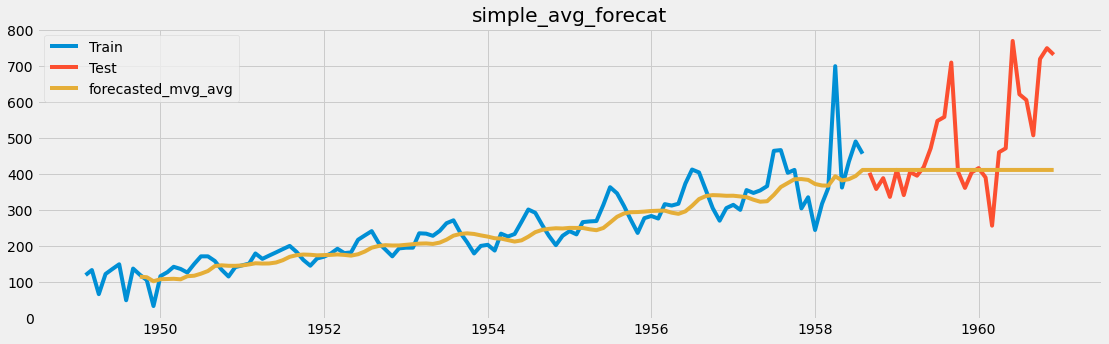

In [85]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers_interpol_l'], label= 'Train')
plt.plot(test['Customers_interpol_l'], label = 'Test')
plt.plot(y_mvg_avg['forecasted_mvg_avg'], label= 'forecasted_mvg_avg')

plt.legend()
plt.title('simple_avg_forecat')
plt.show()

# simple exponential- level is cathc



In [87]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(train['Customers_interpol_l'])
model_fit = model.fit(smoothing_level=0.2)
model_fit.params
y_exp = test.copy()
y_exp['Exponential_forecast'] = model_fit.forecast(24)

/home/shane/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


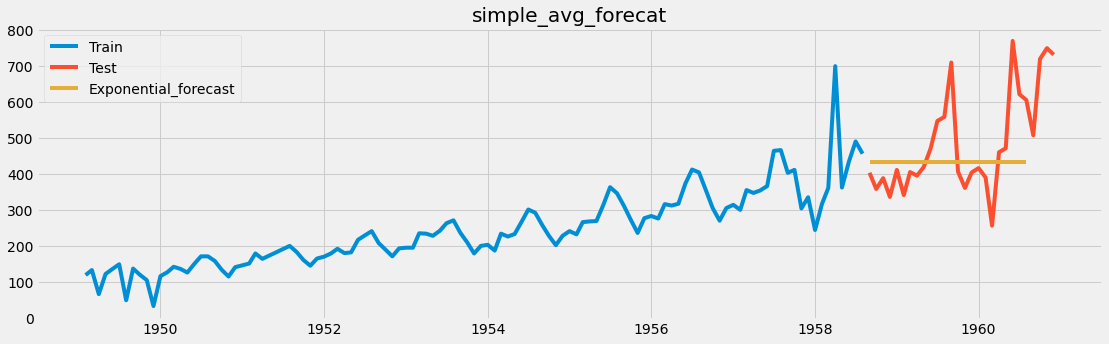

In [88]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers_interpol_l'], label= 'Train')
plt.plot(test['Customers_interpol_l'], label = 'Test')
plt.plot(y_exp['Exponential_forecast'], label= 'Exponential_forecast')

plt.legend()
plt.title('simple_avg_forecat')
plt.show()

# Holt and Holt winter exponential smoothing
this capture level and trend both

In [89]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train['Customers_interpol_l'], seasonal_periods=12, trend='multiplicative')
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.04)
model_fit.params
y_exp = test.copy()
y_exp['holts_forecast'] = model_fit.forecast(24)

/home/shane/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


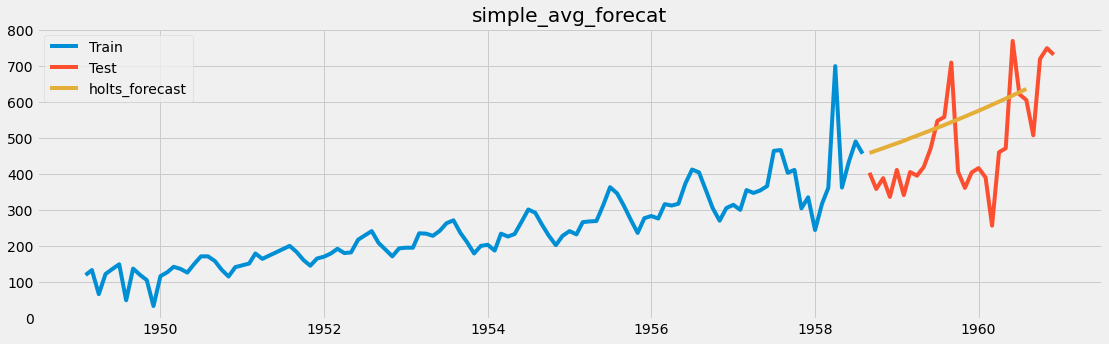

In [90]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers_interpol_l'], label= 'Train')
plt.plot(test['Customers_interpol_l'], label = 'Test')
plt.plot(y_exp['holts_forecast'], label= 'holts_forecast')

plt.legend()
plt.title('simple_avg_forecat')
plt.show()

# Holt Winter

* use three level, trend, seasonality 

In [92]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train['Customers_interpol_l'], seasonal_periods=12, trend='multiplicative', seasonal=
                            'additive')
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.04)
model_fit.params
y_exp = test.copy()
y_exp['holts_winter_forecast'] = model_fit.forecast(24)

/home/shane/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


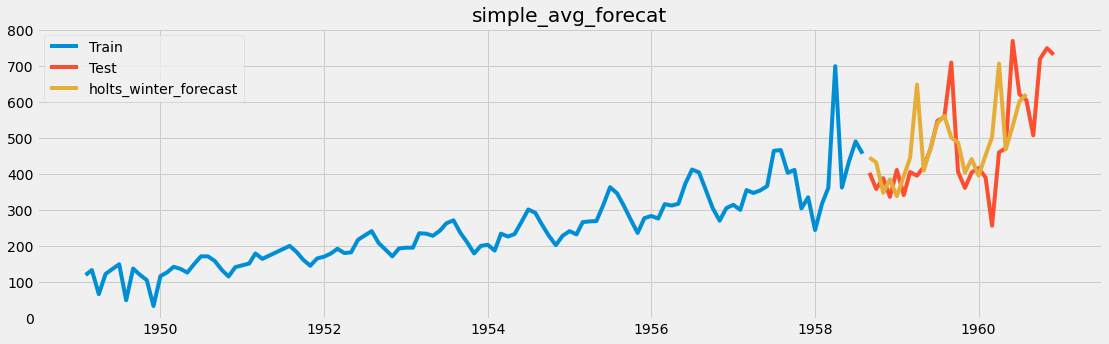

In [93]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers_interpol_l'], label= 'Train')
plt.plot(test['Customers_interpol_l'], label = 'Test')
plt.plot(y_exp['holts_winter_forecast'], label= 'holts_winter_forecast')

plt.legend()
plt.title('simple_avg_forecat')
plt.show()